# Optimal resource states for Phase Estimation by A. Luis and J. Peřina

Resource states proposed by A. Luis and J. Peřina (1996) for optimal phase measurements

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `LPRSInterimPrep`
Helper Bloq to prepare an intermediate resource state which can be used in AA

Specifically, this prepares the state

$$
    \sqrt{\frac{1}{2^{m}}}\sum_{n=0}^{2^m - 1}\left(\cos{\left(\frac{\pi(n+1)}{2^m+1}\right)}
    |n\rangle|0\rangle + i\sin{\left(\frac{\pi(n+1)}{2^m+1}\right)}|n\rangle|1\rangle\right)
$$

This is the state obtained after applying the Hadamard on the flag qubit as described in
Eq 19 of https://arxiv.org/pdf/1805.03662.pdf, which can then be used in a single round of
Amplitude Amplification to boost the amplitude of desired resource state to 1.

In [2]:
from qualtran.bloqs.phase_estimation.lp_resource_state import LPRSInterimPrep

### Example Instances

In [3]:
lprs_interim_prep = LPRSInterimPrep(5)

#### Graphical Signature

In [4]:
from qualtran.drawing import show_bloqs
show_bloqs([lprs_interim_prep],
           ['`lprs_interim_prep`'])

### Call Graph

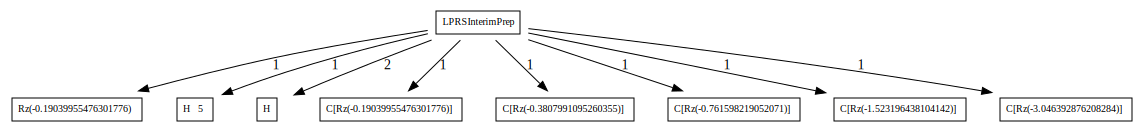

#### Counts totals:
 - `C[Rz(-0.19039955476301776)]`: 1
 - `C[Rz(-0.3807991095260355)]`: 1
 - `C[Rz(-0.761598219052071)]`: 1
 - `C[Rz(-1.523196438104142)]`: 1
 - `C[Rz(-3.046392876208284)]`: 1
 - `H`: 2
 - `H⨂5`: 1
 - `Rz(-0.19039955476301776)`: 1

In [5]:
from qualtran.resource_counting.generalizers import ignore_split_join
lprs_interim_prep_g, lprs_interim_prep_sigma = lprs_interim_prep.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(lprs_interim_prep_g)
show_counts_sigma(lprs_interim_prep_sigma)

## `LPResourceState`
Prepares optimal resource state $\chi_{m}$ proposed by A. Luis and J. Peřina (1996)

Uses a single round of amplitude amplification, as described in Ref 2, to prepare the
resource state from Ref 1 described as

$$
\chi_{m} = \sqrt{\frac{2}{2^m + 1}}\sum_{n=0}^{2^m - 1}\sin{\frac{\pi(n+1)}{2^m+1}}|n\rangle
$$

#### Parameters
 - `bitsize`: The size of the phase register to prepare the resource state on.  

#### References
 - [Optimum phase-shift estimation and the quantum description of the phase difference](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.54.4564). 
 - [Encoding Electronic Spectra in Quantum Circuits with Linear T Complexity](https://arxiv.org/abs/1805.03662). Section II-B


In [6]:
from qualtran.bloqs.phase_estimation.lp_resource_state import LPResourceState

### Example Instances

In [7]:
lp_resource_state_small = LPResourceState(5)

In [8]:
import sympy

lp_resource_state_symbolic = LPResourceState(sympy.Symbol('n'))

#### Graphical Signature

In [9]:
from qualtran.drawing import show_bloqs
show_bloqs([lp_resource_state_small, lp_resource_state_symbolic],
           ['`lp_resource_state_small`', '`lp_resource_state_symbolic`'])

### Call Graph

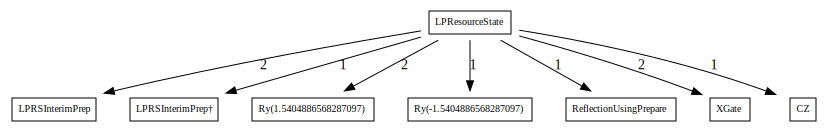

#### Counts totals:
 - `CZ`: 1
 - `LPRSInterimPrep`: 2
 - `LPRSInterimPrep†`: 1
 - `ReflectionUsingPrepare`: 1
 - `Ry(-1.5404886568287097)`: 1
 - `Ry(1.5404886568287097)`: 2
 - `XGate`: 2

In [10]:
from qualtran.resource_counting.generalizers import ignore_split_join
lp_resource_state_small_g, lp_resource_state_small_sigma = lp_resource_state_small.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(lp_resource_state_small_g)
show_counts_sigma(lp_resource_state_small_sigma)